In [1]:
# Works best with jupyter-notebook

In [24]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import math
import numpy as np

from spatialmath import *
from spatialmath.base import *

import roboticstoolbox as rtb
from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr

import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 6.4 Analytic Inverse Kinematics

In this notebook, we will begin to explore the inverse kinematics for a 6DOF 3D robot. 

---

Under the DHRobot class, we have a number of inverse kinemtic methods that we will study:
https://github.com/petercorke/robotics-toolbox-python/wiki/Kinematics
https://petercorke.github.io/robotics-toolbox-python/arm_dh.html

**Analytic method:**
- sol = ikine_a(T, config='lun'): for specific DH robots only

*Note: Wherever possible use analytic methods as they are much faster and more accurate.*

**Numeric method:**
- sol = ikine_LM(T, q0=None): Numerical inverse kinematics by Levenberg-Marquadt optimization (Robot superclass)

- sol = ikine_min(qlim=True) which uses scipy.minimize with user cost function and stiffness. 

--- 

The elements of the tuple sol include at least:


Element   | Type 	      | Description 
:---|:---|:---
q 	      | ndarray (n)   | Joint coordinates for the solution, or None 
:---|:---|:---
success   | bool 	      | True if a solution found 
:---|:---|:---
reason 	  | str 	      | reason for failure 
:---|:---|:---
iterations| int 	      | number of iterations 
:---|:---|:---
residual  | float 	      | final value of cost function 

---

Note that **numerical IK solvers** minimise a *scalar measure of error* between the current and the desired end-effector pose. The measure is the squared-norm of a 6-vector comprising:

- translational error (a 3-vector)
- the orientation error as an Euler vector (angle/axis form encoded as a 3-vector)

The SciPy based mimimizers are **slow** because they use a scalar cost measure and must *numerically compute a Jacobian* in order to solve.


Let's start by creating a model for the Puma560 robot.

In [25]:
puma = rtb.models.DH.Puma560()
print(puma)

┏━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃         dⱼ         ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.6718299999999999 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃                  0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃            0.15005 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃             0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃                  0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃                  0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
└─────┴─────┴

Plot with joint angles at zero.

<IPython.core.display.Javascript object>


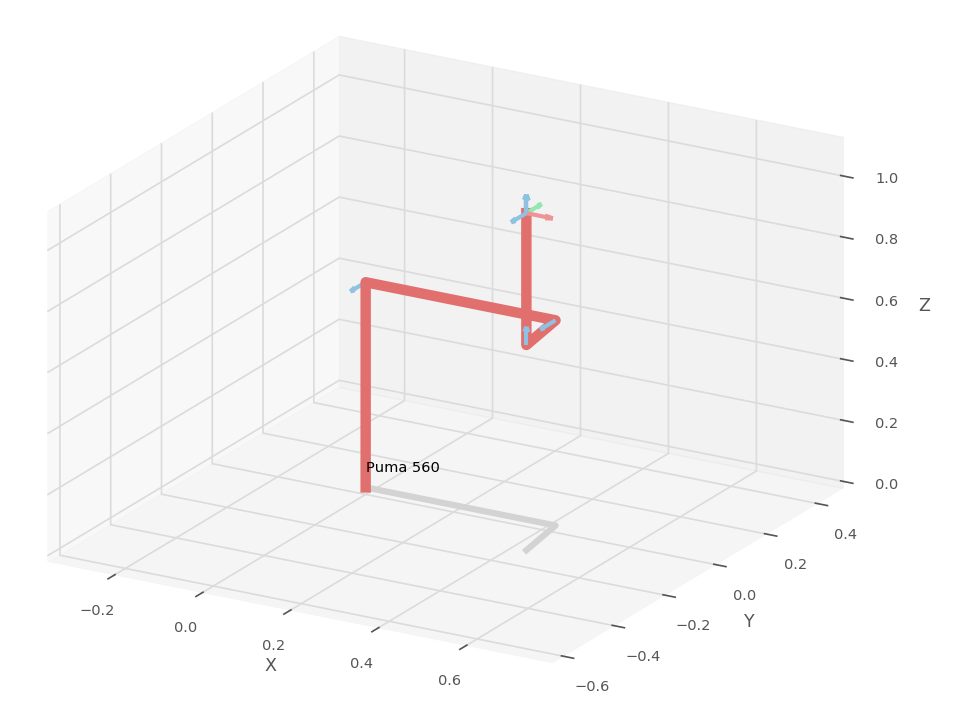

In [26]:
puma.plot(puma.qz);

Let us now designate a desired end-effector pose that we would like the puma robot to reach. 

In [28]:
T0 = SE3(0.6, 0.1, 1)*SE3().RPY([0, 0, 0], unit='deg')
T1 = SE3(0.8, 0.1, 0.5)*SE3().RPY([45, 0, 0], unit='deg')

In [29]:
sol0 = puma.ikine_a(T0)
sol1 = puma.ikine_a(T1)

In [30]:
out = tr.jtraj(puma.qz, sol1.q, tv=100)
#out = tr.jtraj(sol0.q, sol1.q, tv=100)

NameError: name 'tr' is not defined

In [ ]:
robot.plot(out.q)